**LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING. HOMEWORK**

1. Metadata

Ratings of chocolate bars, based on the criteria.

*   Company (Maker-if known): name of the company manufacturing the bar.
*   Specific Bean Originor Bar Name: the specific geo-region of origin for the bar.
*   REF: a value linked to when the review was entered in the database. Higher = more recent.
*   ReviewDate: date of publication of the review.
*   CocoaPercent: cocoa percentage (darkness) of the chocolate bar being reviewed, continuous.
*   CompanyLocation: manufacturer base country.
*   Rating: expert rating for the bar, 1-5, continuous.
*   BeanType: the variety (breed) of bean used, if provided.
*   Broad BeanOrigin: the broad geo-region of origin for the bean.

In [61]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [62]:
# Define the column names as a list
column_names = ['Company (Maker-if known)', 'Specific Bean Originor Bar Name', 'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation',
                'Rating', 'BeanType', 'Broad BeanOrigin']

2. Load Dataset

In [63]:
dataset = pd.read_csv("flavors_of_cacao.csv", names = column_names, sep = ",", skipinitialspace=True)
dataset.head()

Company (Maker-if known)    Specific Bean Originor Bar Name   REF  \
0  Company \n(Maker-if known)  Specific Bean Origin\nor Bar Name   REF   
1                    A. Morin                        Agua Grande  1876   
2                    A. Morin                              Kpime  1676   
3                    A. Morin                             Atsane  1676   
4                    A. Morin                              Akata  1680   

     ReviewDate    CocoaPercent    CompanyLocation  Rating    BeanType  \
0  Review\nDate  Cocoa\nPercent  Company\nLocation  Rating  Bean\nType   
1          2016             63%             France    3.75               
2          2015             70%             France    2.75               
3          2015             70%             France       3               
4          2015             70%             France     3.5               

     Broad BeanOrigin  
0  Broad Bean\nOrigin  
1            Sao Tome  
2                Togo  
3                Togo  
4                Togo

In [64]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  1796
#Features =  9


In [65]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

Empty DataFrame
Columns: [Company (Maker-if known), Specific Bean Originor Bar Name, REF, ReviewDate, CocoaPercent, CompanyLocation, Rating, BeanType, Broad BeanOrigin]
Index: []

In [66]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  2


Filtering missing values

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


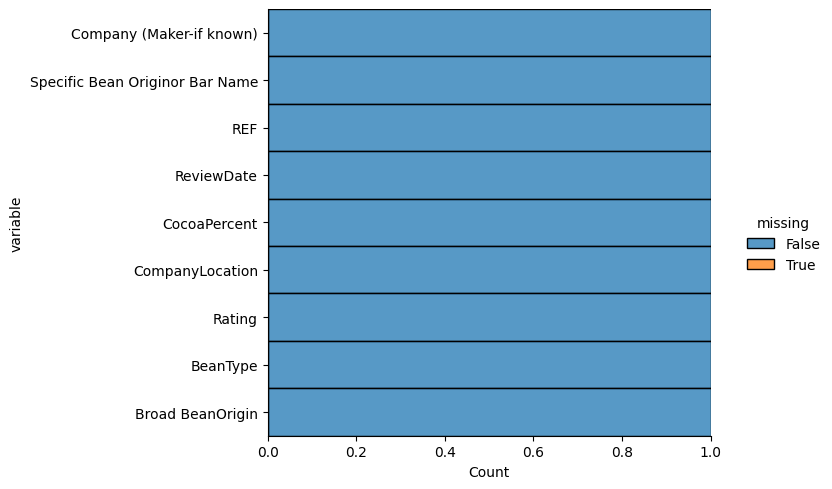

In [67]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [68]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  1794


3. Descriptive Statistical Analysis

Numerical variables

In [69]:
# list of numerical variables
numerical_cols = ['REF', 'ReviewDate', 'Rating']

In [70]:
# Проверяем типы данных
print(dataset[numerical_cols].dtypes)

# Преобразуем все столбцы в numerical_cols в числовые
for col in numerical_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Удаляем строки с NaN после преобразования
dataset.dropna(subset=numerical_cols, inplace=True)

REF           object
ReviewDate    object
Rating        object
dtype: object


Histogram with Frequencies

In [71]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

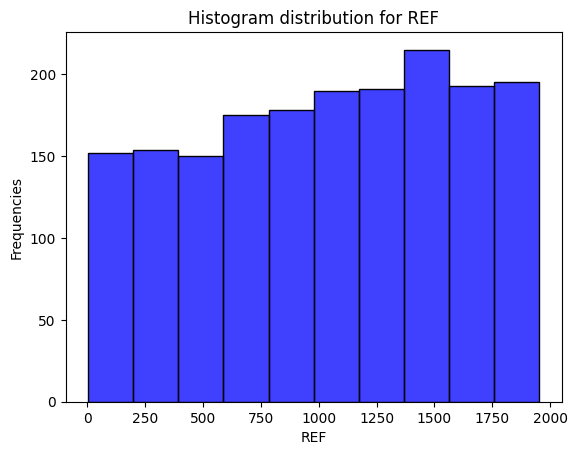

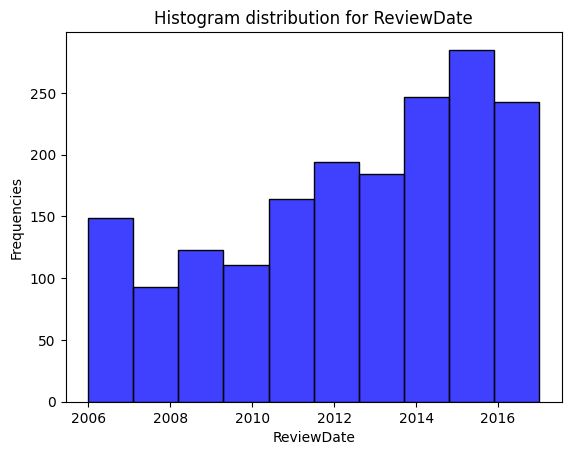

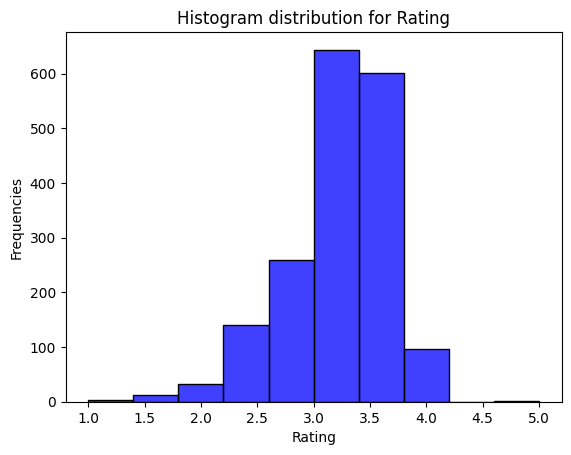

In [72]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

Histogram with Densities and KDE line (kernel density estimate)


In [73]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

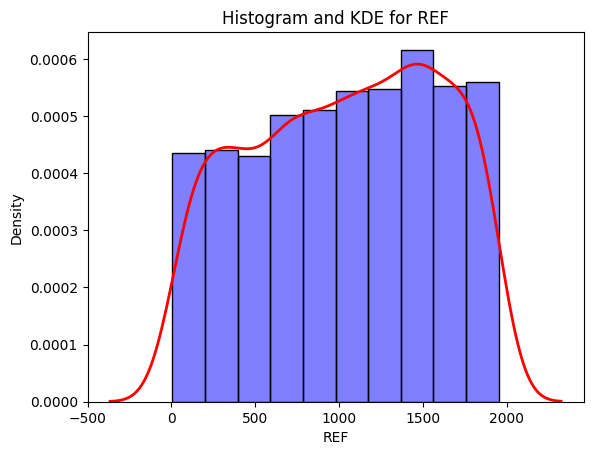

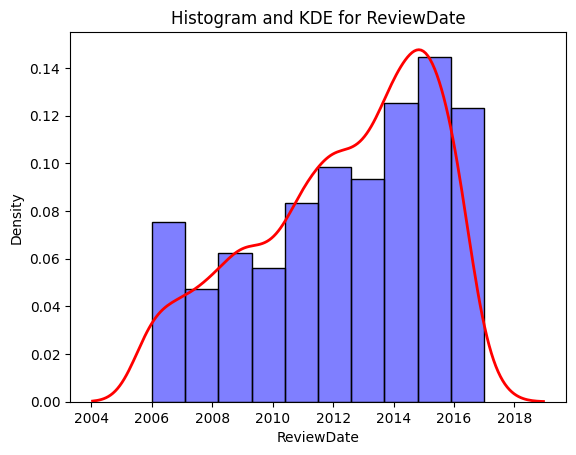

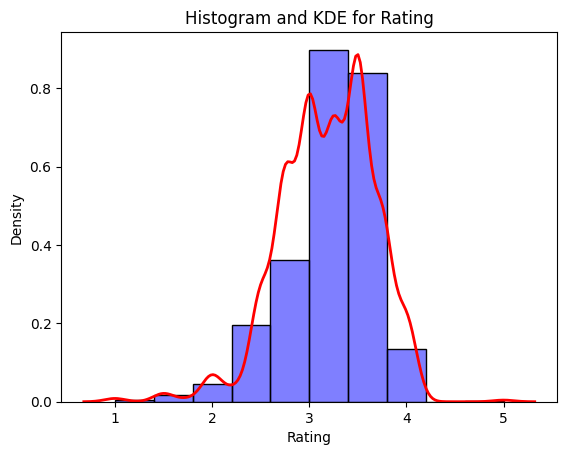

In [74]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Box Plot

In [75]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


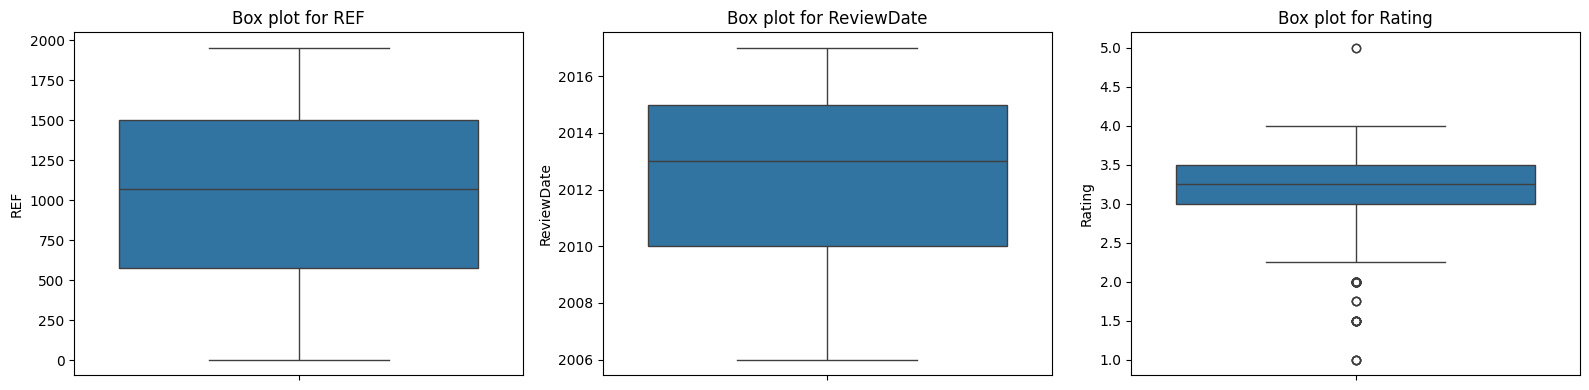

In [76]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

Statistical metrics

In [77]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

REF   ReviewDate       Rating
count  1793.000000  1793.000000  1793.000000
mean   1036.126046  2012.326269     3.185862
std     553.128742     2.928666     0.477668
min       5.000000  2006.000000     1.000000
25%     576.000000  2010.000000     3.000000
50%    1073.000000  2013.000000     3.250000
75%    1502.000000  2015.000000     3.500000
max    1952.000000  2017.000000     5.000000

Correlation Analysis

In [78]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

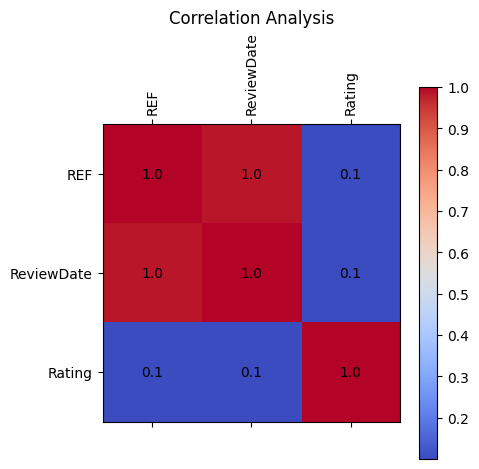

In [79]:
plot_correlation(dataset, numerical_cols)

Implications of Low Correlation

In [80]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)

    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

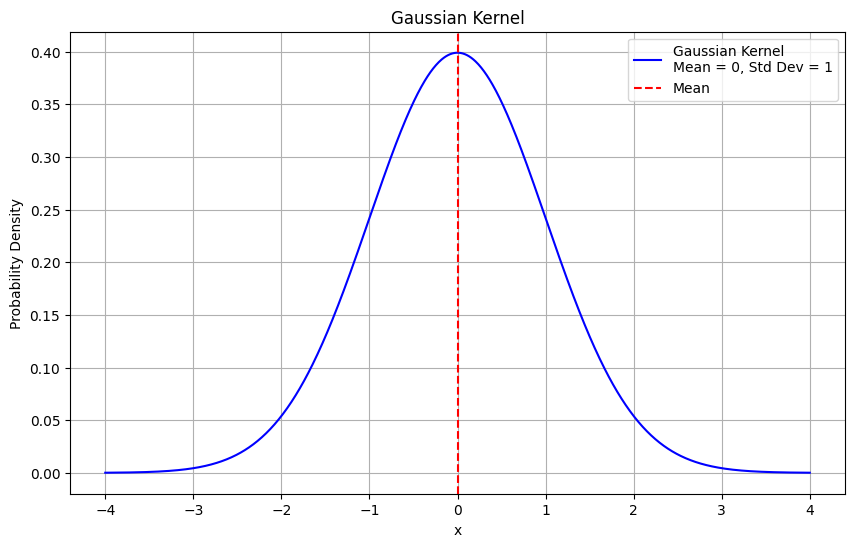

In [81]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [82]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [83]:
call_percentile(z = -2)

2.275

In [84]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)

    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    return outliers

In [86]:
outliers_detection(dataset, "REF").head()

Company (Maker-if known) Specific Bean Originor Bar Name     REF  \
41                Alexandre                Winak Coop, Napo  1944.0   
42                Alexandre             La Dalia, Matagalpa  1944.0   
43                Alexandre                      Tien Giang  1944.0   
44                Alexandre          Makwale Village, Kyela  1944.0   
87                   Amedei                   Toscano Black    40.0   

    ReviewDate CocoaPercent CompanyLocation  Rating              BeanType  \
41      2017.0          70%     Netherlands     3.5  Forastero (Nacional)   
42      2017.0          70%     Netherlands     3.5   Criollo, Trinitario   
43      2017.0          70%     Netherlands     3.5            Trinitario   
44      2017.0          70%     Netherlands     3.5             Forastero   
87      2006.0          70%           Italy     5.0                 Blend   

   Broad BeanOrigin  
41          Ecuador  
42        Nicaragua  
43          Vietnam  
44         Tanzania  
87

In [87]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in REF ***
#samples outlier to distribution = 80
%outliers = 4.46 %

*** Outliers detection in ReviewDate ***
#samples outlier to distribution = 24
%outliers = 1.34 %

*** Outliers detection in Rating ***
#samples outlier to distribution = 19
%outliers = 1.06 %


Categorical Variables

In [88]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['BeanType',
 'Specific Bean Originor Bar Name',
 'Broad BeanOrigin',
 'CompanyLocation',
 'Company (Maker-if known)',
 'CocoaPercent']

Count instances for each categorical column

In [89]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** BeanType ******
BeanType
                            887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Foraster

Bar chart - Analysis of absolute frequencies

In [96]:
# function to plot distribution for 1 categorical column
def plot_count_categories(dataset, col):
    plt.figure(figsize=(20, 15))
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.xlabel("Count", fontsize=9)
    plt.ylabel(col, fontsize=9)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.show()

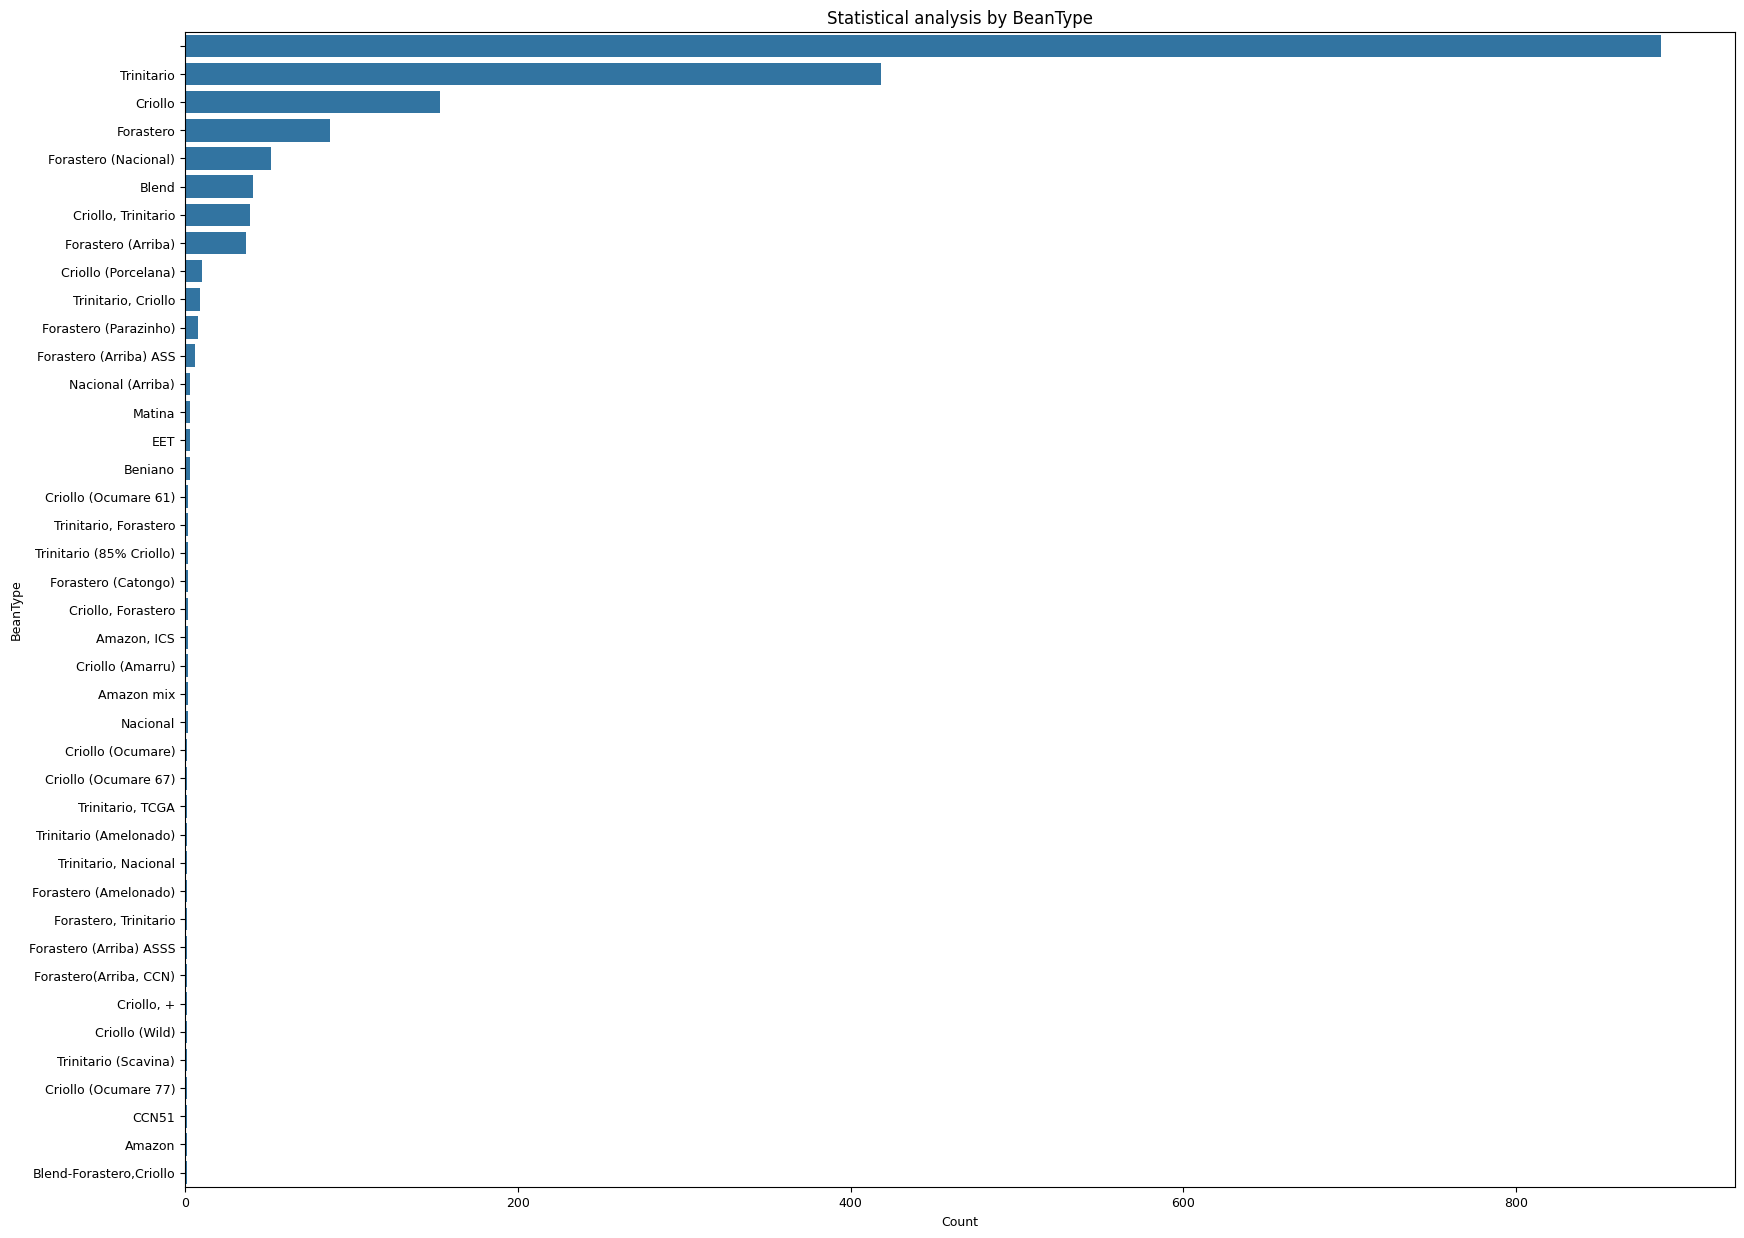

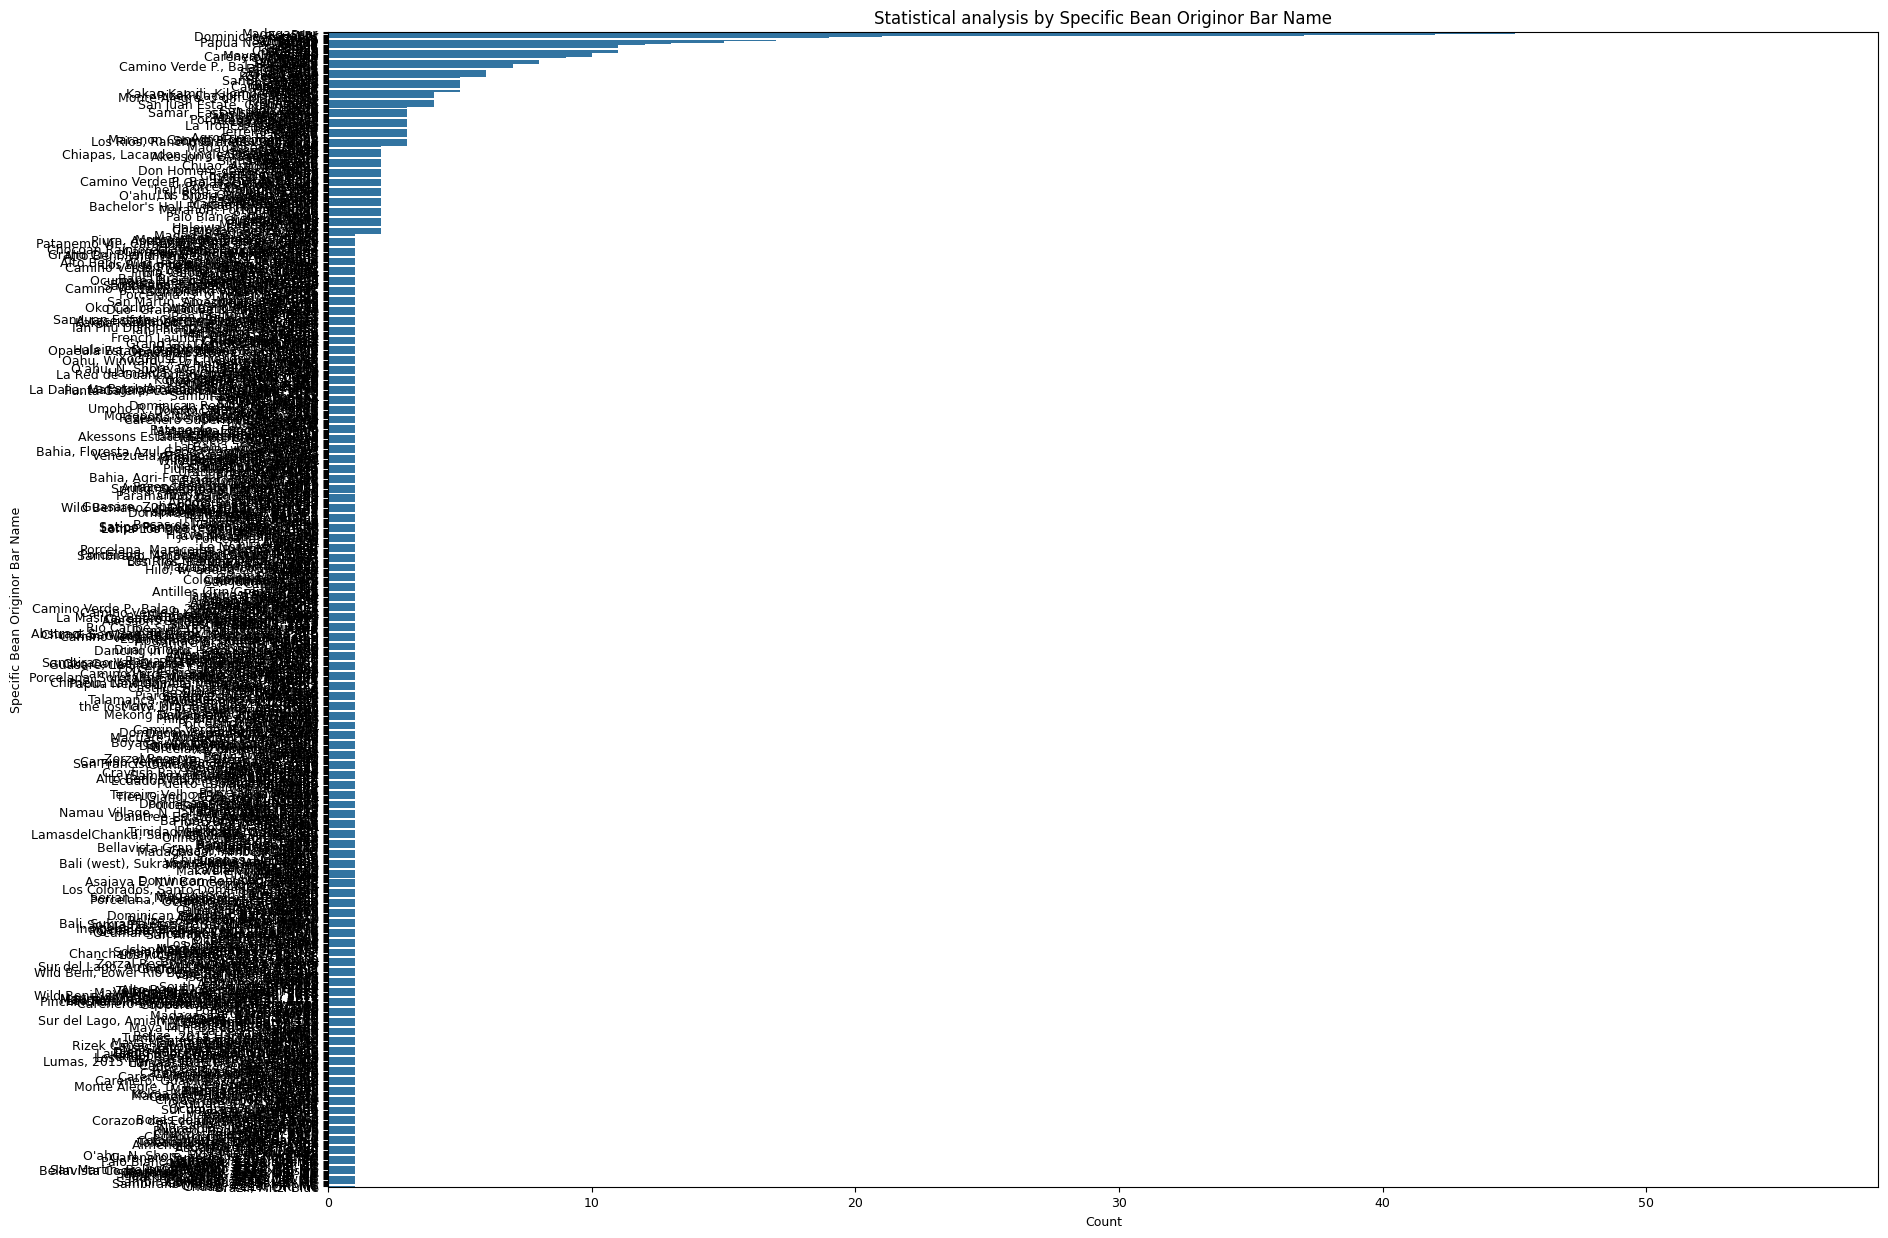

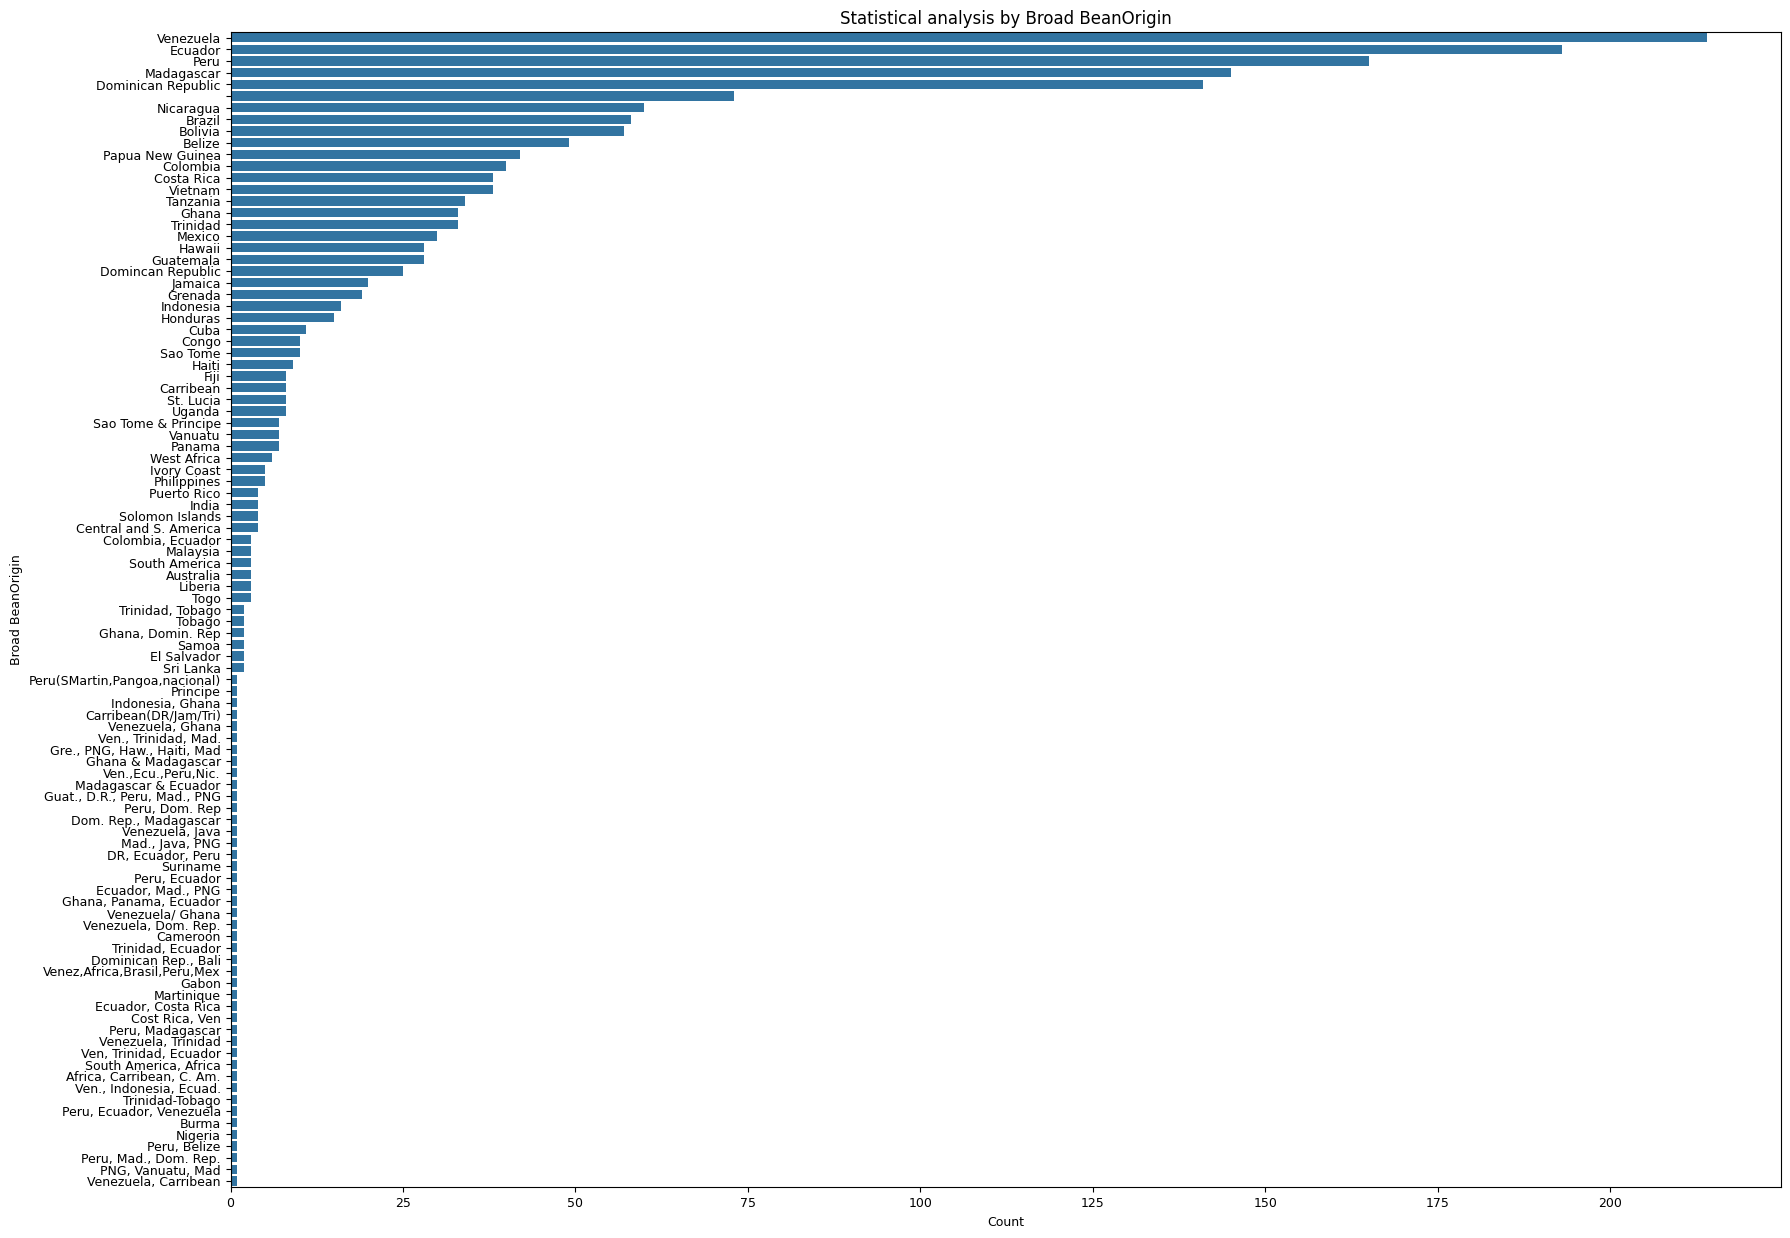

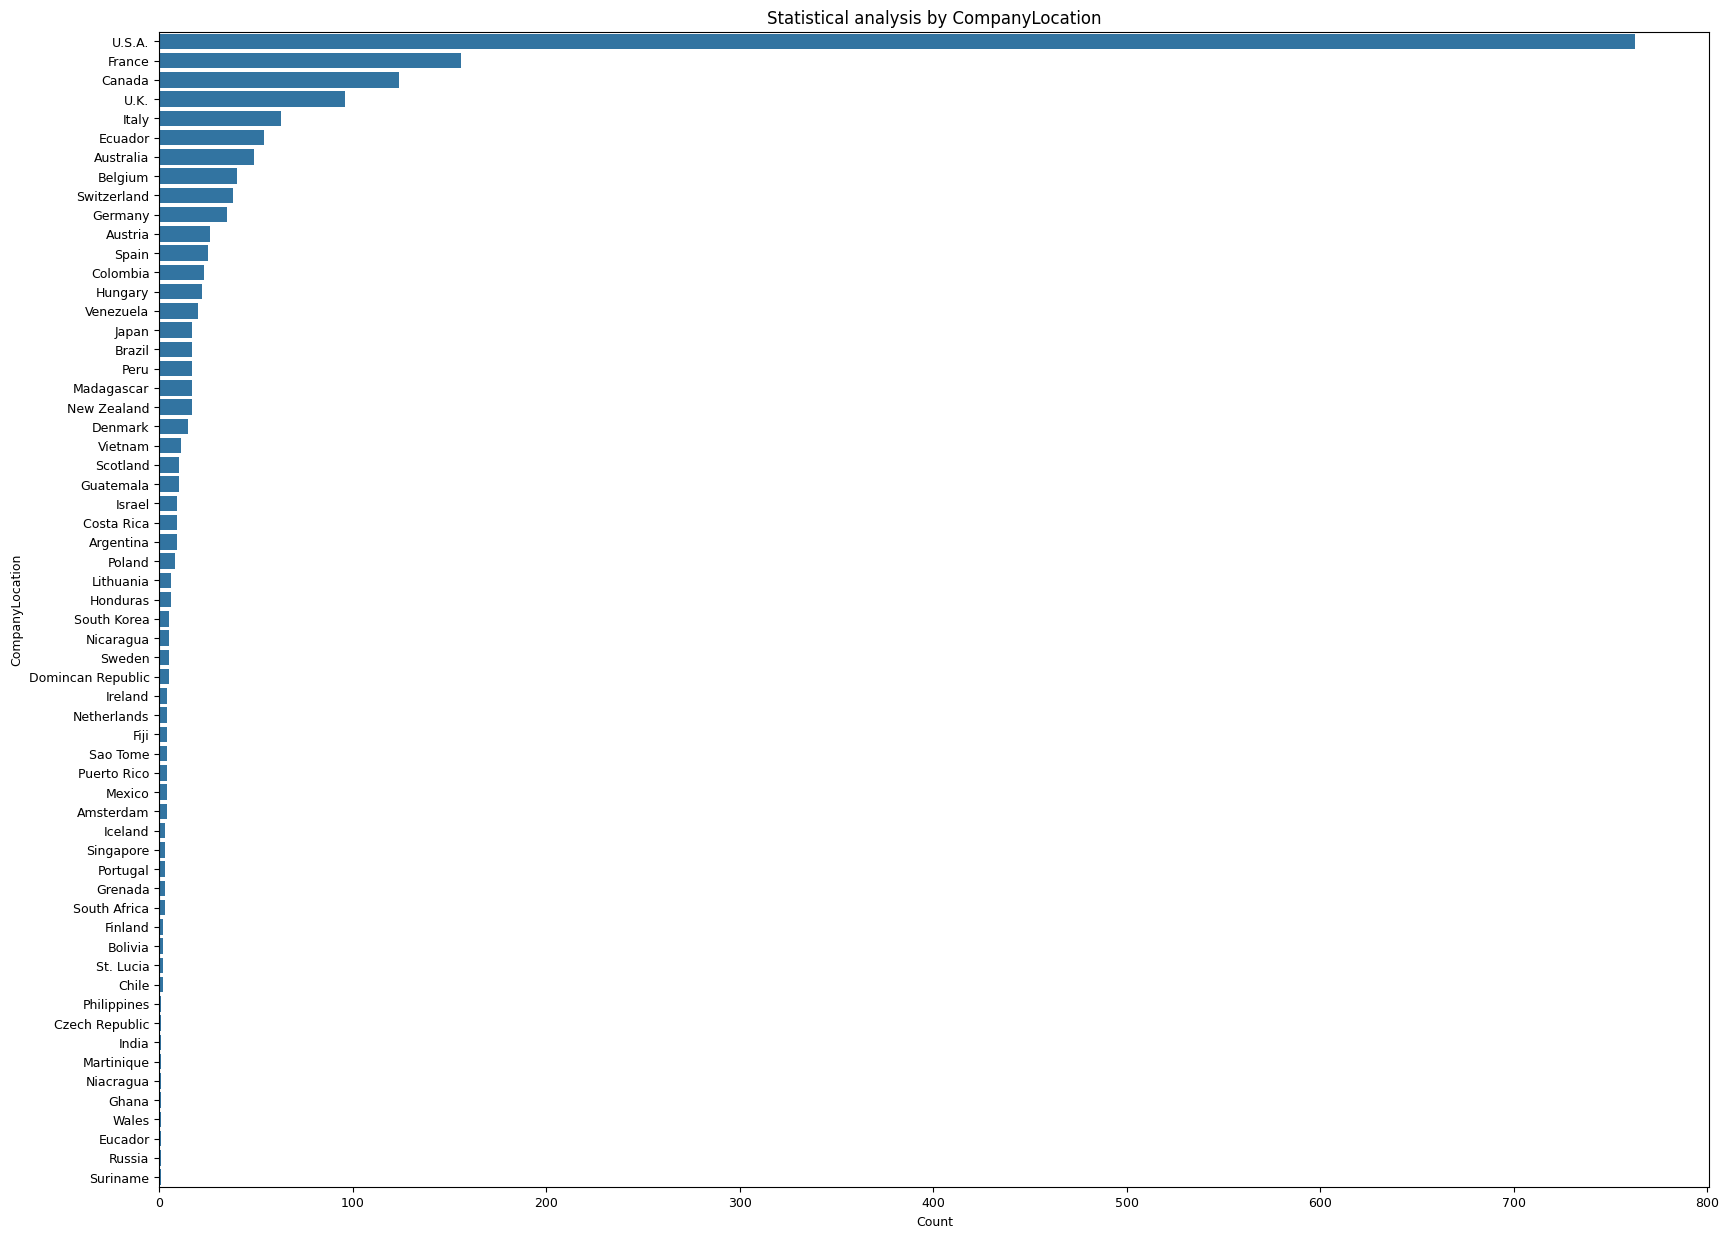

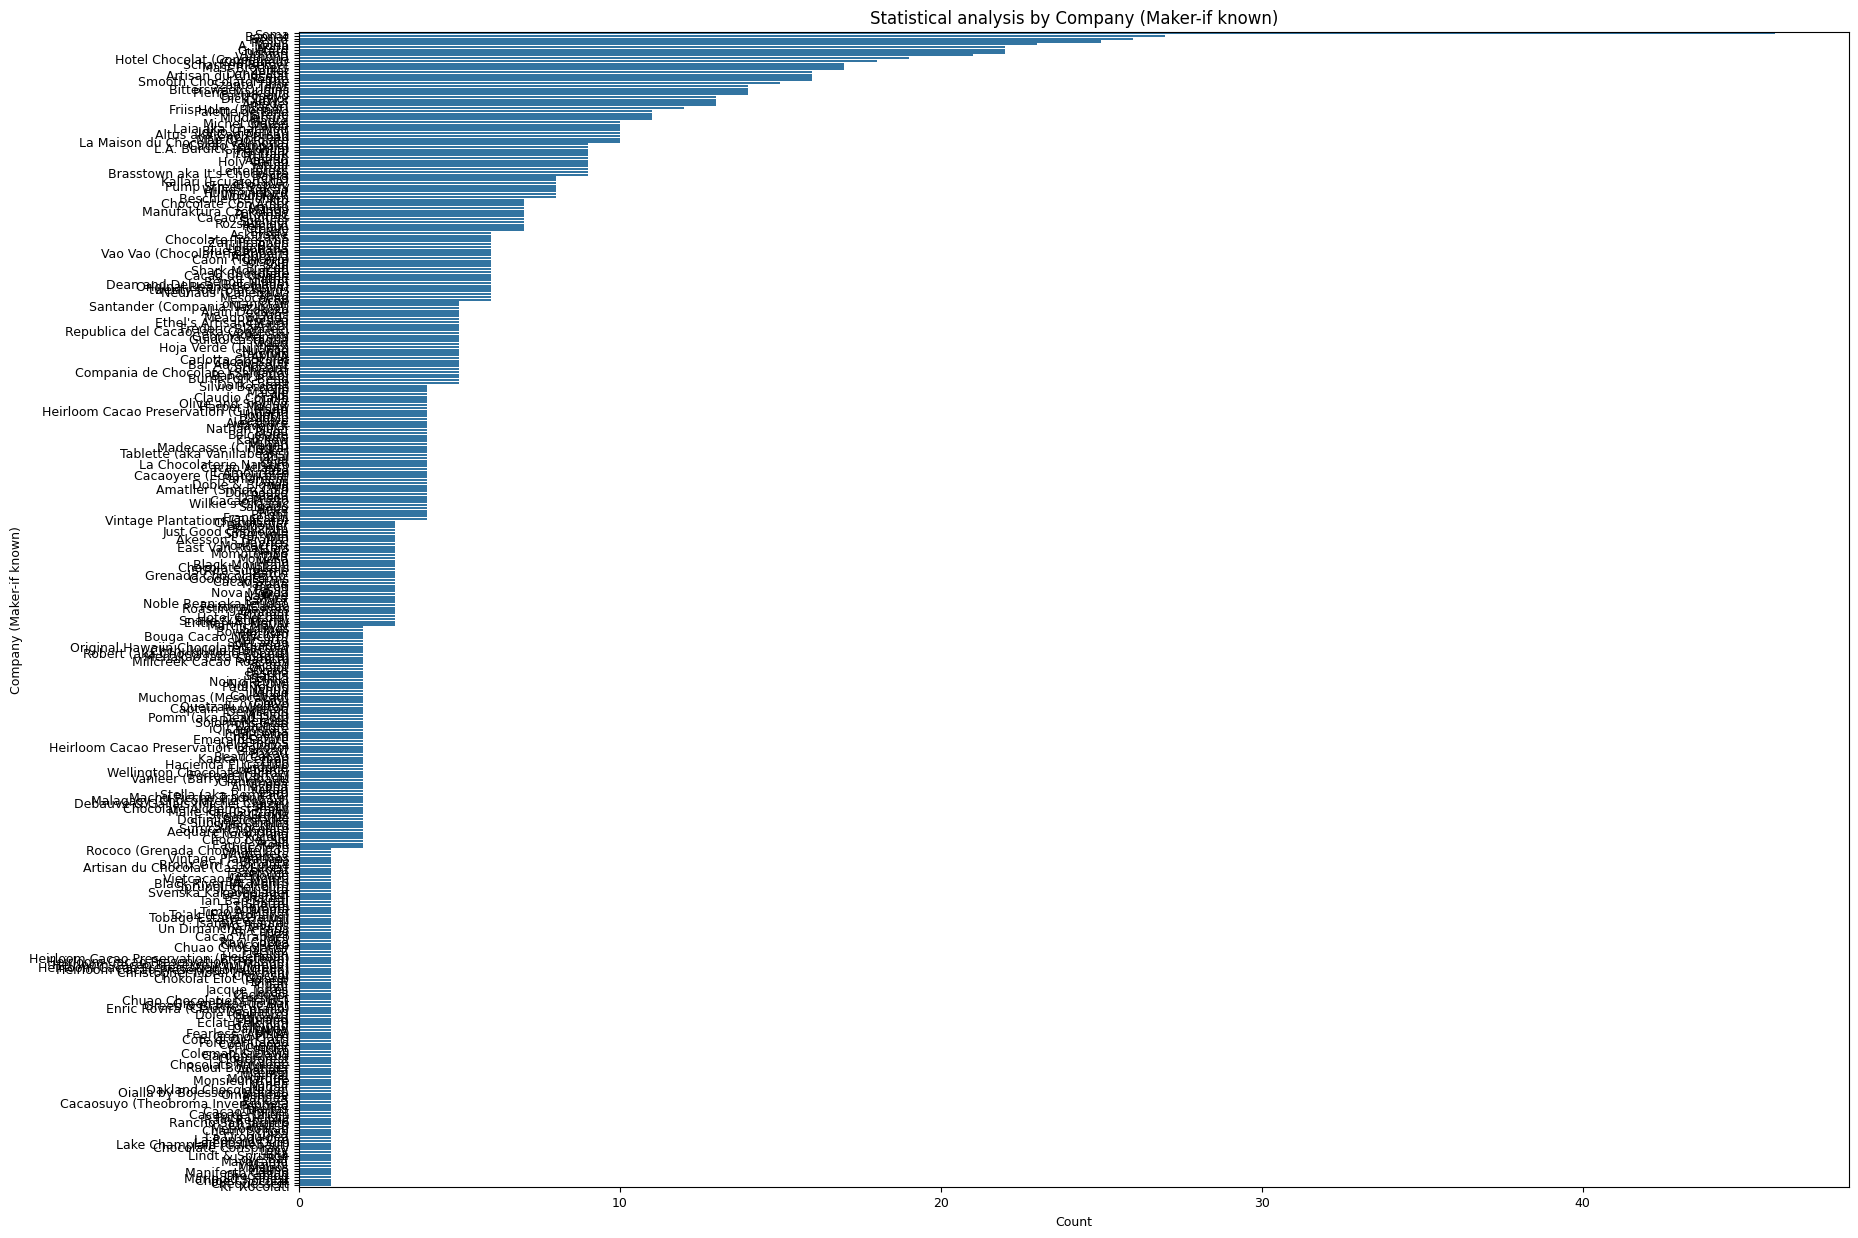

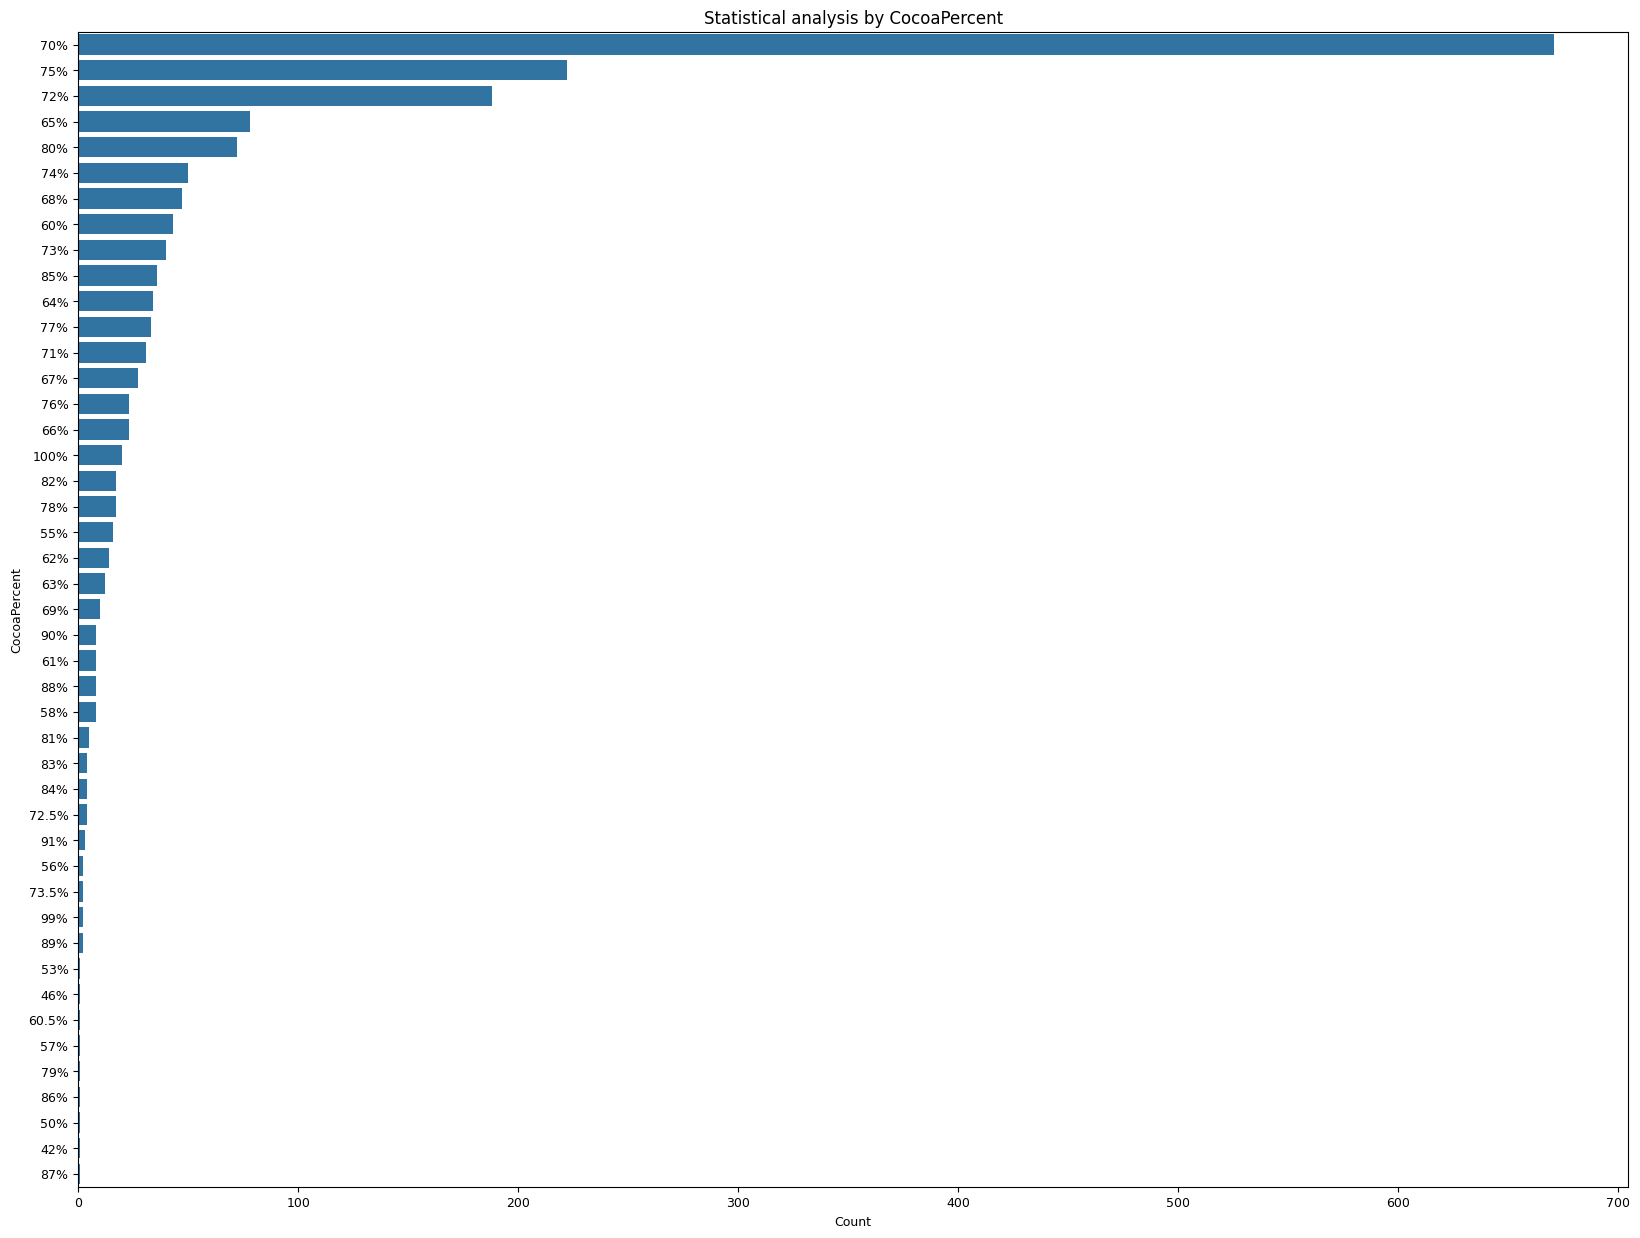

In [97]:
# cycle to plot distribution for each categorical column
for col in categorical_vars:
    plot_count_categories(dataset, col)

Pie Chart - Analysis of relative frequencies

In [100]:
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(8,8))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

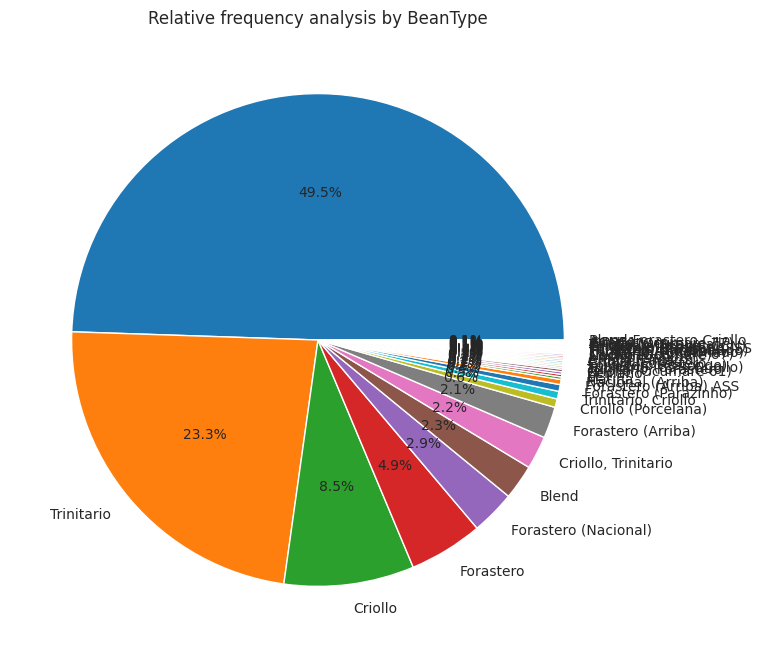

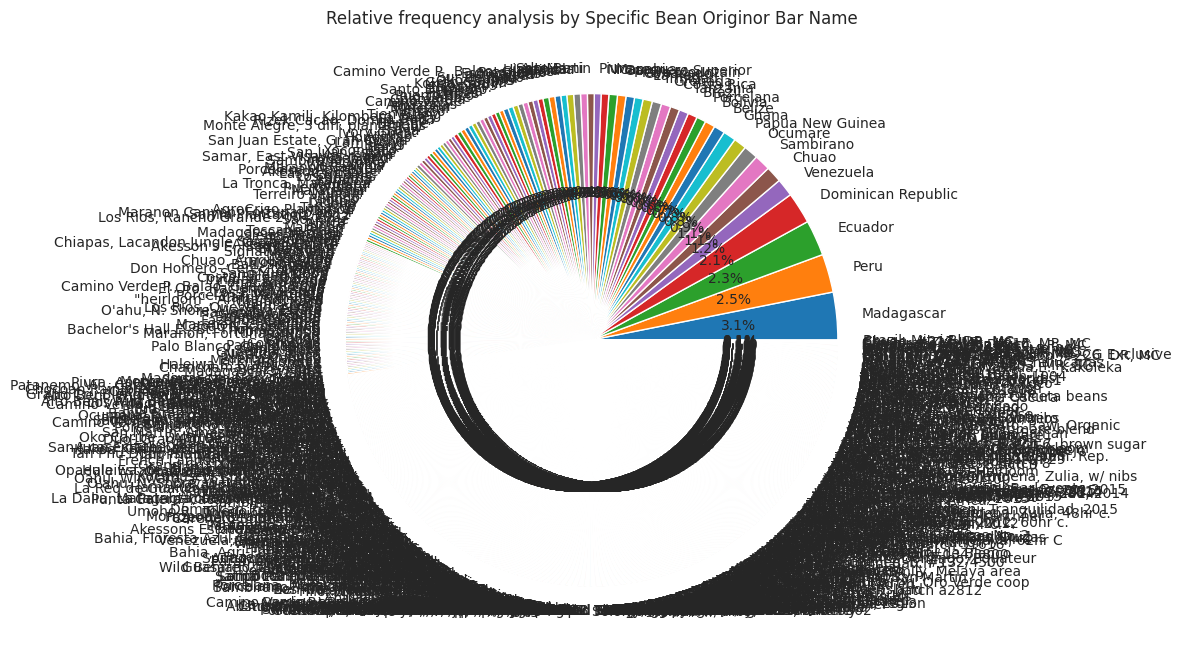

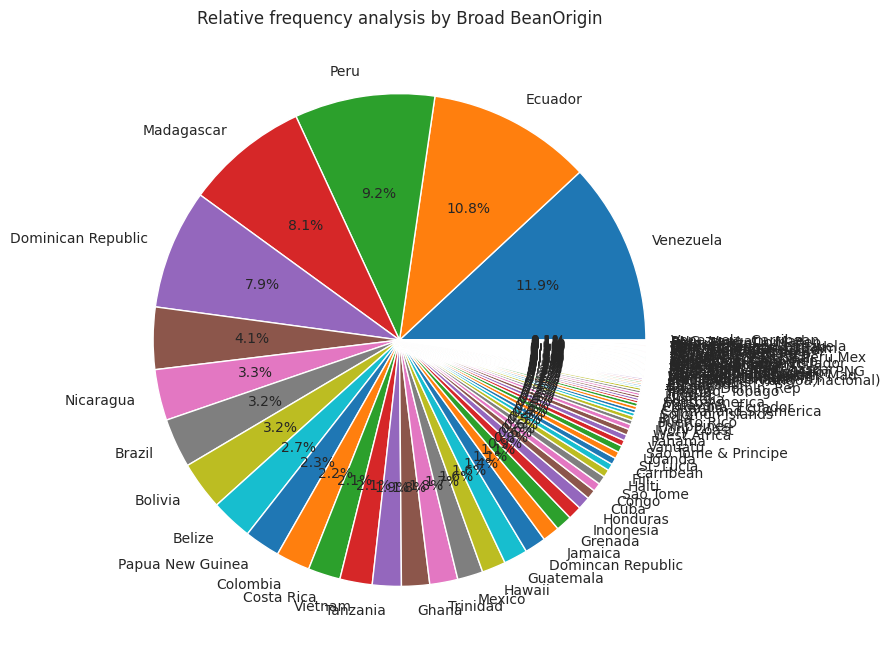

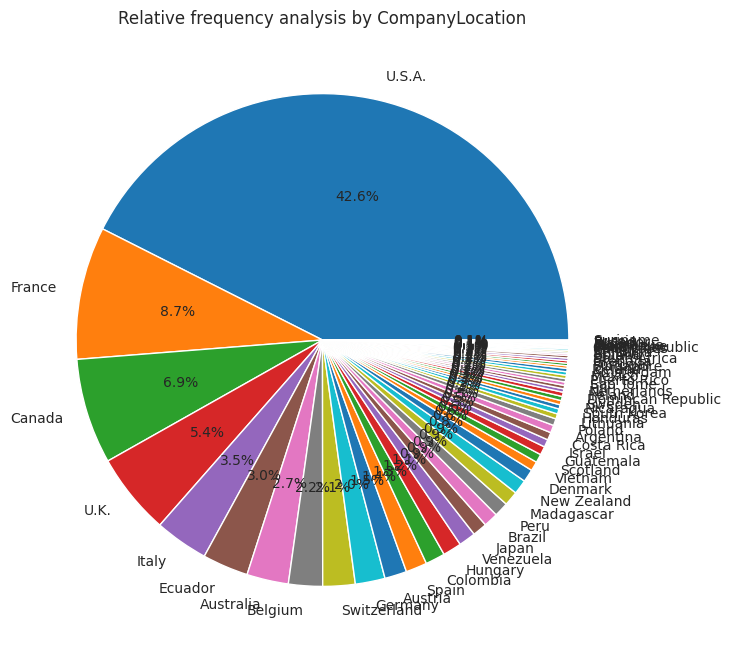

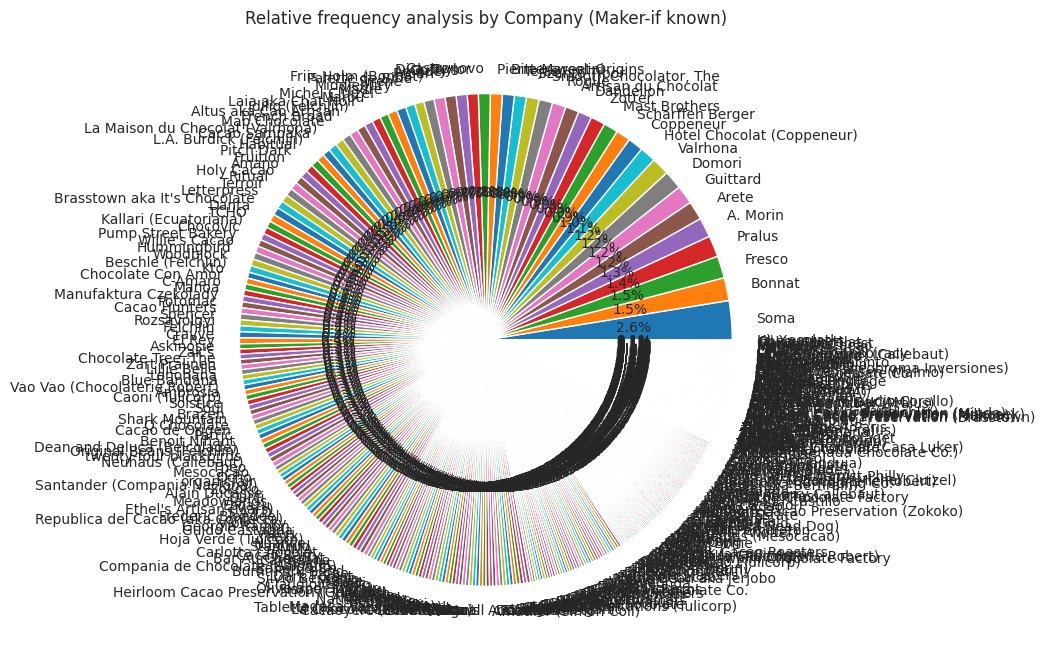

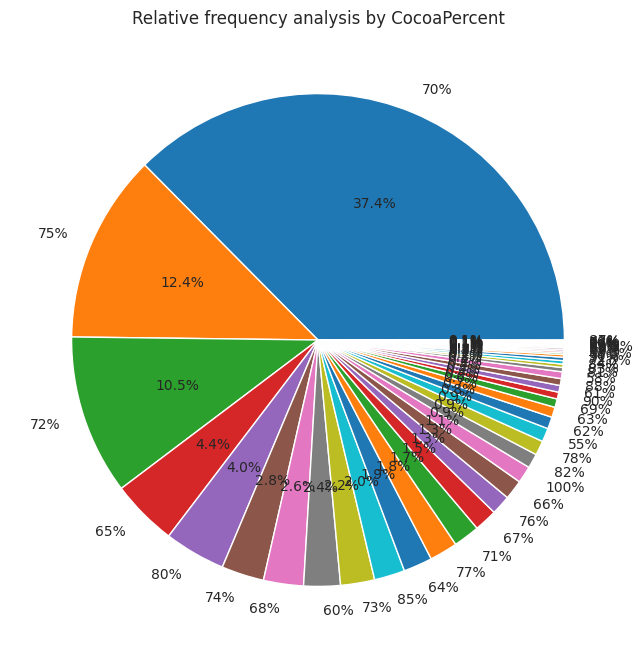

In [101]:
# cycle to plot relative distributions for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Statistical Analysis for subgroups

In [113]:
# create groups organized by sex and income
group_CompanyL_CompanyM = dataset.groupby(["CompanyLocation", "Company (Maker-if known)"]).size().reset_index(name = "samples")
print(group_CompanyL_CompanyM)

    CompanyLocation         Company (Maker-if known)  samples
0         Amsterdam                 Chocolate Makers        3
1         Amsterdam                     Metropolitan        1
2         Argentina  Compania de Chocolate (Salgado)        5
3         Argentina                          Salgado        4
4         Australia                      Bahen & Co.        5
..              ...                              ...      ...
413       Venezuela                       Franceschi        4
414       Venezuela                 Suruca Chocolate        2
415         Vietnam                      Grand Place        1
416         Vietnam                            Marou       10
417           Wales                      Baravelli's        1

[418 rows x 3 columns]


In [114]:
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('CompanyLocation')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by CompanyLocation and Company (Maker-if known)')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

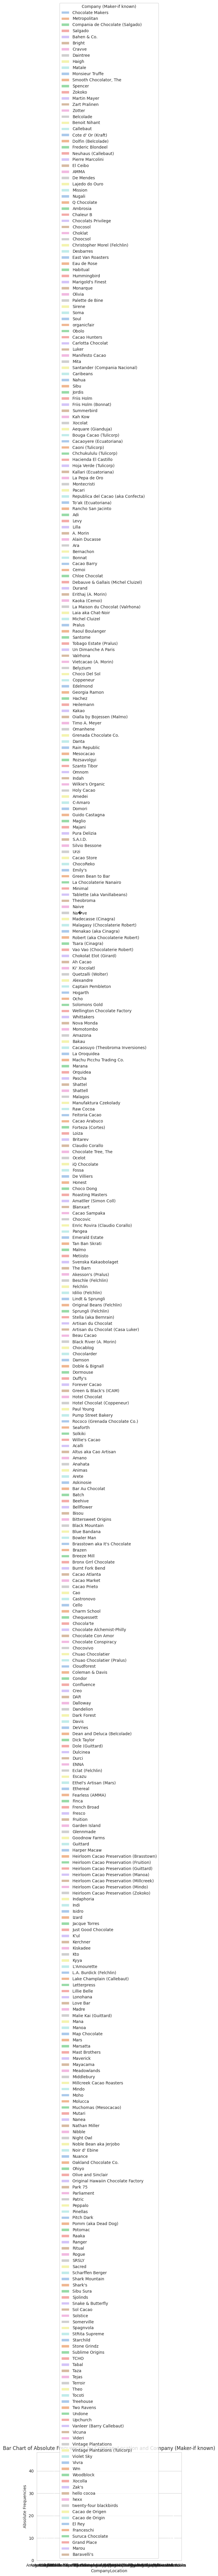

In [115]:
plot_absfreq_groups(group_CompanyL_CompanyM, "CompanyLocation", "Company (Maker-if known)")

In [116]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with salary " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by CompanyLocation and Company (Maker-if known)')
    plt.show()

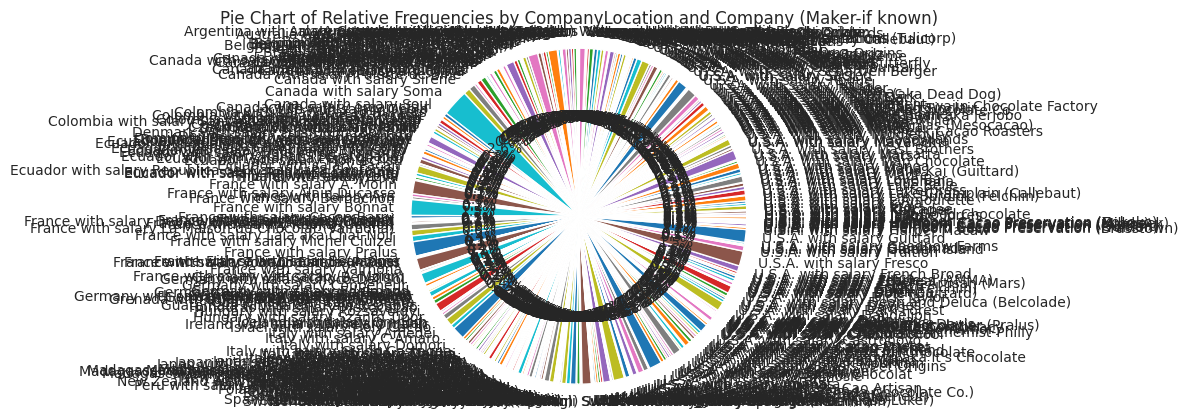

In [117]:
plot_relfreq_groups(group_CompanyL_CompanyM, "CompanyLocation", "Company (Maker-if known)")

It's not clear, but it's beautiful